In [ ]:
import helper
import plotting
from glob import glob
from skimage.color import label2rgb
import matplotlib.pyplot as plt
from cellpose import io

In [ ]:
PATH = ["F:/cellpose/code_demo/"]
MOD_DIR = "F:/cellpose/code_demo/train/models/"

## Deploy prediction helper

In [ ]:
all_results = helper.prediction.batch_predict(MOD_DIR,PATH,mute=True,configuration=[[],{'diameter':10}],return_results=True)

FH_boosted found...


F:/cellpose/code_demo//test/: 100%|██████████| 1/1 [00:11<00:00, 11.75s/image]


1 ['4_P1060348_3']


F:/cellpose/code_demo//train/: 100%|██████████| 6/6 [01:04<00:00, 10.73s/image]


7 ['4_P1060348_3', '1_P1060330_1', '2_P1060338_0', '3_P1060343_3', '5_P1060351_2', '6_P1060355_0', '7_P1060359_3']
8
cellpose_residual_on_style_on_concatenation_off_train_2022_10_13_11_18_34 found...


F:/cellpose/code_demo//test/: 100%|██████████| 1/1 [00:06<00:00,  6.38s/image]


8 ['4_P1060348_3', '1_P1060330_1', '2_P1060338_0', '3_P1060343_3', '5_P1060351_2', '6_P1060355_0', '7_P1060359_3', '4_P1060348_3']


F:/cellpose/code_demo//train/: 100%|██████████| 6/6 [00:36<00:00,  6.01s/image]

14 ['4_P1060348_3', '1_P1060330_1', '2_P1060338_0', '3_P1060343_3', '5_P1060351_2', '6_P1060355_0', '7_P1060359_3', '4_P1060348_3', '1_P1060330_1', '2_P1060338_0', '3_P1060343_3', '5_P1060351_2', '6_P1060355_0', '7_P1060359_3']
22


### Sanity check

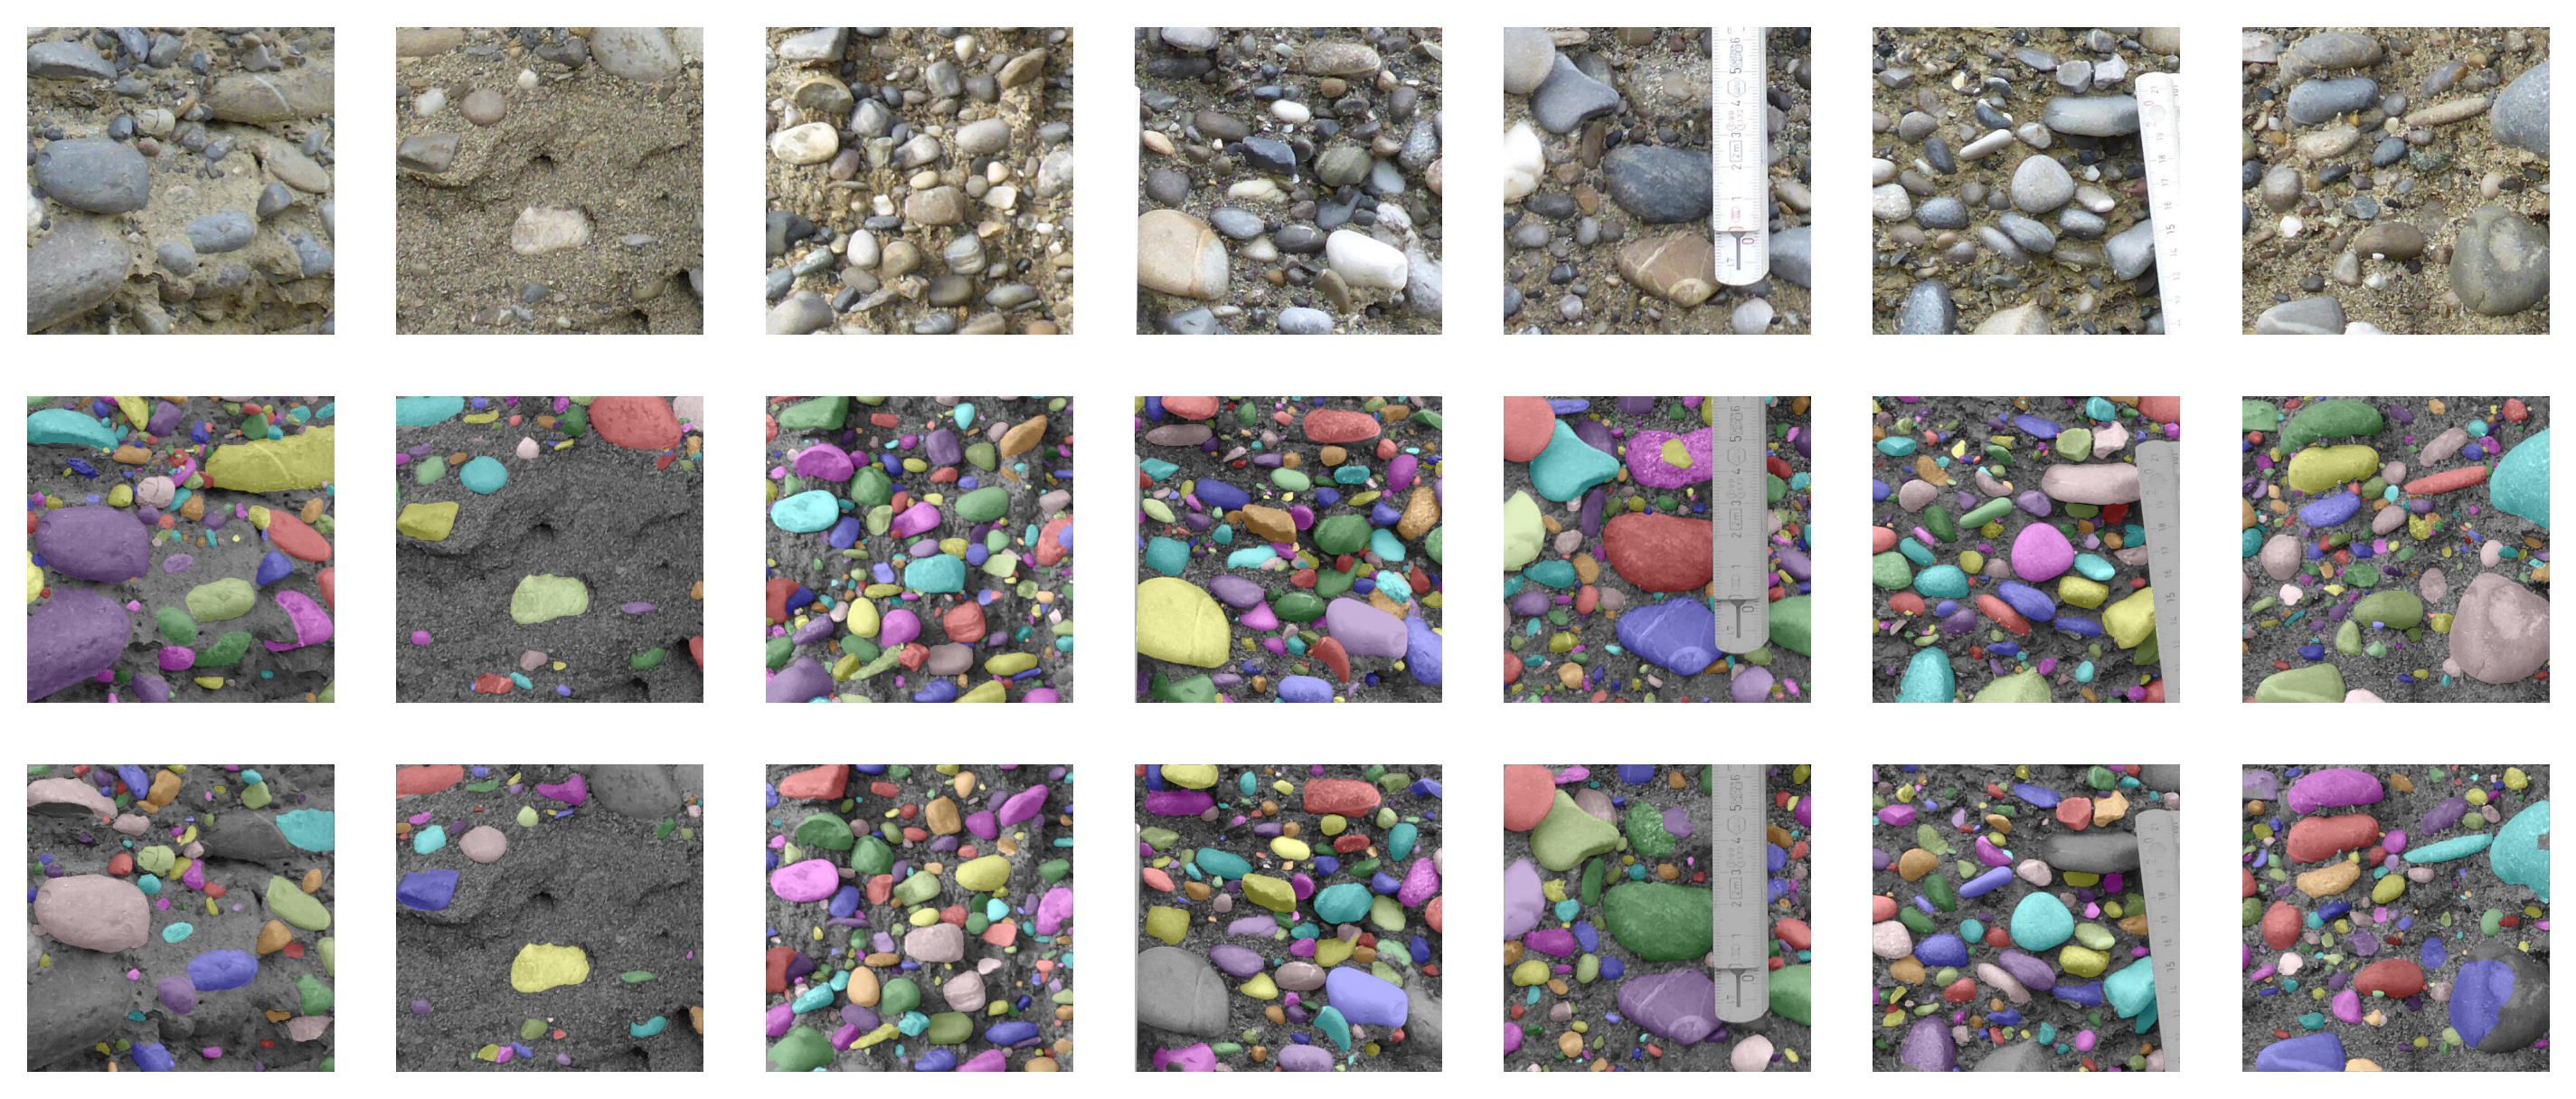

In [ ]:
X = glob(PATH[0]+'/train/'+'*.jpg')
X = X+glob(PATH[0]+'/test/'+'*.jpg')

Y = glob(PATH[0]+'/train/*'+'mask'+'*.tif')
Y = Y+glob(PATH[0]+'/test/*'+'mask'+'*.tif')

Z = glob(PATH[0]+'/train/*'+'boosted'+'*.tif')
Z = Z+glob(PATH[0]+'/test/*'+'boosted'+'*.tif')

plt.figure(figsize=(12,5), dpi=300)
for k in range(len(X)):
    img = io.imread(X[k])
    plt.subplot(3,len(X),k+1)
    
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(3,len(X),len(X) + k+1)
    lbl = io.imread(Y[k])
    #masks= seg['masks'].squeeze()
    plt.imshow(label2rgb(lbl, image=img, bg_label=0))

    plt.axis('off')

    plt.subplot(3,len(X),(len(X)*2)+ k+1)
    prd = io.imread(Z[k])
    plt.imshow(label2rgb(prd, image=img, bg_label=0))
    plt.axis('off')

## Deploy eval helper

In [ ]:
IM_DIR1 = 'F:/cellpose/code_demo/train/'
IM_DIR2 = 'F:/cellpose/code_demo/test/'


In [ ]:
imgs1,lbls1,preds1 = helper.eval.load_from_folders(IM_DIR1,label_str='mask',pred_str='boosted_pred')
imgs2,lbls2,preds2 = helper.eval.load_from_folders(IM_DIR2,label_str='mask',pred_str='boosted_pred')
imgs= imgs1+imgs2
lbls = lbls1+lbls2
preds = preds1+preds2

In [ ]:
eval_results = helper.eval.eval_set(imgs,lbls,preds,dataID='FH_boosted')

### Plot eval results

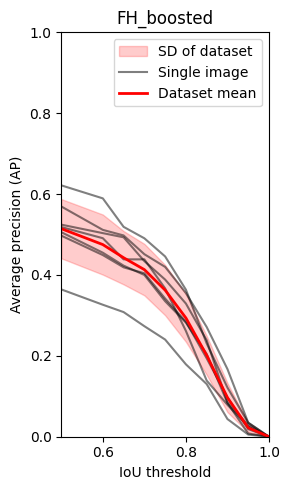

In [ ]:
fig1 = plotting.segmentation.AP_IoU_plot(eval_results,title='FH_boosted')

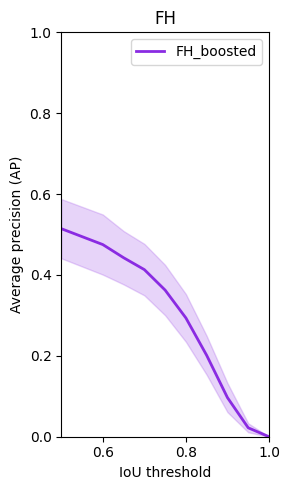

In [ ]:
elem = {
    'dataset':'FH',
    'model_ID':['FH_boosted'],
    'colors':['blueviolet','m','mediumblue'],
    'images':False,
    'SD':True,
    'avg_model':True
    }
fig2= plotting.segmentation.AP_IoU_summary_plot([eval_results],elem)